# I. Lý thuyết

1) Tại sao các mô hình deep learning lại chiếm ưu thế hơn so với các mô hình machine learning truyền thống đối với dữ liệu lớn ?

A. Do mô hình deep learning có thể được thiết kế với kích thước tùy ý nên có khả năng xấp xỉ mọi hàm số. Do đó nó có khả năng biểu diễn tốt và hoạt động hiệu quả trên dữ liệu lớn.

B. Các mô hình machine learning thường bị overfitting đối với dữ liệu lớn ?

C. Các mô hình deep learning có chi phí huấn luyện tốn kém hơn so với machine learning.

D. Do kiến trúc của mô hình Machine Learning bao gồm nhiều layers xếp chồng.


2) Ý nghĩa của hàm loss function trong mạng neural network là gì ?

A. Là hàm số đánh giá độ chính xác của mô hình.

B. Mục tiêu của quá trình huấn luyện là tối thiểu hóa hàm loss function bằng thuật toán gradient descent. Giá trị của hàm số này giúp đo lường mức độ khớp của dự báo từ mô hình trên dữ liệu huấn luyện.

C. Khi loss function giảm thì luôn đảm bảo độ chính xác của mô hình tăng.

D. Là hàm số cần tối đa hóa trong quá trình huấn luyện.


3) Khi huấn luyện trên các bộ dữ liệu bigdata thì chúng ta nên sử dụng phương pháp nào ?

A) Sử dụng gradient descent trên toàn bộ dữ liệu.

B) Sử dụng stochastic gradient descent trên từng điểm dữ liệu.

C) Mini-batch gradient descent huấn luyện mô hình trên từng tập dữ liệu con có kích thước nhỏ hơn memory CPU/GPU.

D) Có thể sử dụng stochastic gradient descent hoặc mini-batch gradient descent.


4) Quá trình feed forward và backpropagation thực hiện những gì ?

A) feed forward tính toán output và loss function, backpropagation tính đạo hàm trên từng layer và cập nhật trọng số.

B) feed forward cập nhật trọng số cho mô hình, backpropagation tính toán output và loss function.

C) feed forward tính ra output của mô hình, backpropagation tính toán loss function

D) feed forward được thực hiện sau backpropagation.

5) Tác dụng của batch normalization là gì ?

A) Loại bỏ một tỷ lệ ngẫu nhiên số lượng units tại mỗi layer để tạo thành nhiều kiến trúc kết hợp ngẫu nhiên.

B) Tìm ra các tham số phân phối là trung bình và phương sai trên từng mini-batch.

C) Đồng nhất phân phối xác suất của $z^{[l]}$ trên mỗi layer $l$.

D) Giảm thiểu ảnh hưởng của input distribution shift nhằm giúp huấn luyện loss function nhanh và ổn định hơn.

In [ ]:
'''
    1.A
    2.B
    3.C
    4.A
    5.D

'''

'\n    1.A\n    2.B\n    3.C\n    4.A\n    5.D\n\n'

# II. Thực hành

Xuất phát từ mô hình tốt nhất của bạn xây dựng được đối với bài toán phân loại income classification tại bài trước. Bạn hãy thực hiện một số thử nghiệm sau:

6) Thay đổi hàm loss function, batch size và optimizer.

7) Thử nghiệm thêm các layers mà bạn đã học được trong bài này vào kiến trúc của mình.

8) Thay đổi các khởi tạo trọng số theo các phân phối khác nhau và đánh giá độ chính xác của kết quả huấn luyện.

9) Thiết lập không gian search và tự động hóa tìm kiếm kiến trúc tốt nhất trên optuna.

10) Deploy model sử dụng flask ap. Tham khảo [Flaskapp tutorial](https://drive.google.com/file/d/1AZNtzrmnhJ-OBgijWoaAqXbPhJ6xL0Po/view?usp=sharing).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/TwDS
!ls

/content/drive/MyDrive/TwDS
income_model.pth  sample_submission.csv  test.csv  train.csv


In [ ]:
import torch.nn as nn
import torch

import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import random
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [ ]:
#metric
def get_metrics(y_test, y_pred):
    print('ACCURACY_SCORE: ', round(accuracy_score(y_test, y_pred), 4))
    print('F1_SCORE: ', round(f1_score(y_test, y_pred, average='macro'), 4))
    print('CONFUSION_MATRIX:\n', confusion_matrix(y_test, y_pred),'\n')
    print(classification_report(y_test, y_pred, digits=4), '\n')

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,ID,age,work_type,final_weight,education,total_education_yrs,marital_state,job,status,ethnicity,sex,capital_gain,capital_loss,hrs_per_week,nationality,target_income
0,0,45,Private,175925,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,M,0,0,40,US,0
1,1,23,Private,113601,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,M,0,0,30,US,0
2,2,22,Private,112137,Some-college,10,Never-married,Prof-specialty,Other-relative,Asian-Pac-Islander,F,0,0,20,South,0
3,3,27,Private,153078,Prof-school,15,Never-married,Prof-specialty,Own-child,Asian-Pac-Islander,M,0,0,40,US,0
4,4,18,Private,375515,11th,7,Never-married,Sales,Own-child,White,F,0,0,20,US,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   25000 non-null  int64 
 1   age                  25000 non-null  int64 
 2   work_type            25000 non-null  object
 3   final_weight         25000 non-null  int64 
 4   education            25000 non-null  object
 5   total_education_yrs  25000 non-null  int64 
 6   marital_state        25000 non-null  object
 7   job                  25000 non-null  object
 8   status               25000 non-null  object
 9   ethnicity            25000 non-null  object
 10  sex                  25000 non-null  object
 11  capital_gain         25000 non-null  int64 
 12  capital_loss         25000 non-null  int64 
 13  hrs_per_week         25000 non-null  int64 
 14  nationality          25000 non-null  object
 15  target_income        25000 non-null  int64 
dtypes: i

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


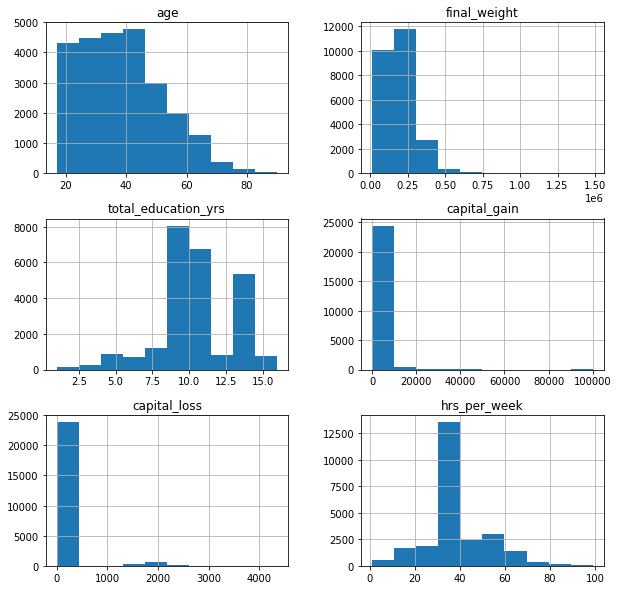

In [ ]:
sec = ['age', 'final_weight', 'total_education_yrs', 'capital_gain', 'capital_loss', 'hrs_per_week']

fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df[sec].hist(ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:71: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


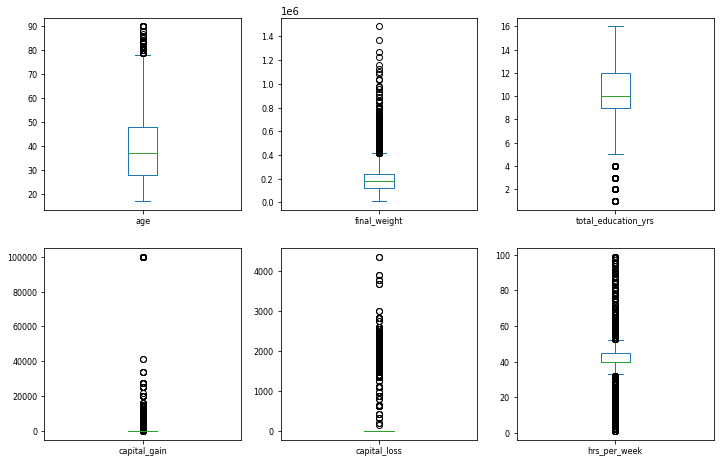

In [ ]:
fig = plt.figure(figsize = (12,12))
ax = fig.gca()
df[sec].plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, fontsize=8, ax=ax)
plt.show()

In [ ]:
# Remove some outlier

# df = df[df['final_weight'] < 0.5]
df = df[df['capital_gain'] < 20000]
df = df[df['capital_loss'] < 2000]
df.shape
df.reset_index(inplace=True)

In [ ]:
# Drop NaN value

df['work_type'] = df['work_type'].replace('?', np.nan)
df['job'] = df['job'].replace('?', np.nan)
df = df[df['work_type'].notna()]
df = df[df['job'].notna()]

In [ ]:
ed = ['work_type', 'education', 'marital_state', 'job', 'status', 'ethnicity', 'nationality', 'sex']

df = pd.get_dummies(df, columns=ed)

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['ID', 'target_income'], axis=1)
y = df[['target_income']]

x_train, x_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    test_size=0.20, 
                                                    random_state=42)
#normalize
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

print('X train shape: ', x_train.shape)
print('y train shape: ', y_train.shape)

X train shape:  (18555, 105)
y train shape:  (18555, 1)


In [ ]:
import torch
import torch.nn as nn
import torch.utils.data as td
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducability
torch.manual_seed(0)

print("Libraries imported - ready to use PyTorch", torch.__version__)

Libraries imported - ready to use PyTorch 1.10.0+cu111


In [ ]:
# Create a dataset and loader for the training data and labels
train_x = torch.Tensor(x_train).float()
train_y = torch.Tensor(y_train).view(-1, 1).float()
train_ds = td.TensorDataset(train_x,train_y)
train_loader = td.DataLoader(train_ds, batch_size=32,
    shuffle=True, num_workers=1)

# Create a dataset and loader for the test data and labels
test_x = torch.Tensor(x_test).float()
test_y = torch.Tensor(y_test).view(-1, 1).float()
test_ds = td.TensorDataset(test_x,test_y)
test_loader = td.DataLoader(test_ds, batch_size=32,
    shuffle=False, num_workers=1)
print('Ready to load data')

Ready to load data


In [ ]:
# Define the neural network
class IncomeNet(nn.Module):
    def __init__(self):
        super(IncomeNet, self).__init__()
        self.fc1 = nn.Linear(105, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.dropout1=nn.Dropout(0.25)

        self.fc2 = nn.Linear(64, 32)
        self.bn2 = nn.BatchNorm1d(32)
        self.dropout2=nn.Dropout(0.25)

        self.fc3 = nn.Linear(32, 16)
        self.bn3 = nn.BatchNorm1d(16)
        self.dropout3=nn.Dropout(0.25)

        self.fc4 = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.bn1(x))
        x = self.dropout1(x)

        x = torch.relu(self.fc2(x))
        x = torch.relu(self.bn2(x))
        x = self.dropout2(x)

        x = torch.relu(self.fc3(x))
        x = torch.relu(self.bn3(x))
        x = self.dropout3(x)

        x = torch.sigmoid(self.fc4(x))
        return x

# Create a model instance from the network
model = IncomeNet()
print(model)

IncomeNet(
  (fc1): Linear(in_features=105, out_features=64, bias=True)
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (bn2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.25, inplace=False)
  (fc3): Linear(in_features=32, out_features=16, bias=True)
  (bn3): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout3): Dropout(p=0.25, inplace=False)
  (fc4): Linear(in_features=16, out_features=1, bias=True)
)


In [ ]:
def train(model, data_loader, optimizer):
    # Set the model to training mode
    model.train()
    train_loss = 0
    
    for batch, tensor in enumerate(data_loader):
        data, target = tensor
        #feedforward: calculate y_pred and loss function
        optimizer.zero_grad()
        out = model(data)

        loss = loss_criteria(out, target)
        train_loss += loss.item()

        # backpropagate: compute gradient descent and update weights
        loss.backward()
        optimizer.step()

    #Return average loss
    avg_loss = train_loss / (batch+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss
           
            
def test(model, data_loader):
    # Switch the model to evaluation mode (so we don't backpropagate)
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        batch_count = 0
        for batch, tensor in enumerate(data_loader):
            batch_count += 1
            data, target = tensor
            # Get the predictions
            out = model(data)

            # calculate the loss
            test_loss += loss_criteria(out, target).item()

            # Calculate the accuracy
            predicted = (out.data > 0.5)
            predicted = predicted.reshape(-1,1)
            correct += torch.sum(target==predicted).item()
            
    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss/batch_count
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))
    
    # return average loss for the epoch
    return avg_loss

In [ ]:
loss_criteria = nn.BCELoss()

learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer.zero_grad()

# We'll track metrics for each epoch in these arrays
epoch_nums = []
training_loss = []
validation_loss = []

# Train over 50 epochs
epochs = 50
for epoch in range(1, epochs + 1):

    # print the epoch number
    print('Epoch: {}'.format(epoch))
    
    # Feed training data into the model to optimize the weights
    train_loss = train(model, train_loader, optimizer)
    
    # Feed the test data into the model to check its performance
    test_loss = test(model, test_loader)
    
    # Log the metrics for this epoch
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)

Epoch: 1
Training set: Average loss: 0.775394
Validation set: Average loss: 0.690274, Accuracy: 2100/4639 (45%)

Epoch: 2
Training set: Average loss: 0.651510
Validation set: Average loss: 0.647678, Accuracy: 3550/4639 (77%)

Epoch: 3
Training set: Average loss: 0.605740
Validation set: Average loss: 0.616929, Accuracy: 3555/4639 (77%)

Epoch: 4
Training set: Average loss: 0.578909
Validation set: Average loss: 0.601841, Accuracy: 3555/4639 (77%)

Epoch: 5
Training set: Average loss: 0.557427
Validation set: Average loss: 0.589443, Accuracy: 3555/4639 (77%)

Epoch: 6
Training set: Average loss: 0.539851
Validation set: Average loss: 0.570041, Accuracy: 3555/4639 (77%)

Epoch: 7
Training set: Average loss: 0.529280
Validation set: Average loss: 0.558093, Accuracy: 3554/4639 (77%)

Epoch: 8
Training set: Average loss: 0.515864
Validation set: Average loss: 0.545694, Accuracy: 3555/4639 (77%)

Epoch: 9
Training set: Average loss: 0.502900
Validation set: Average loss: 0.542726, Accuracy: 

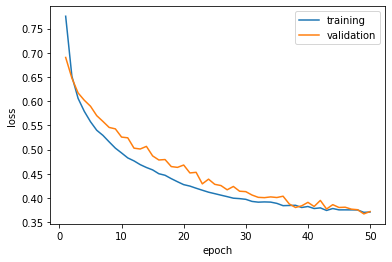

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

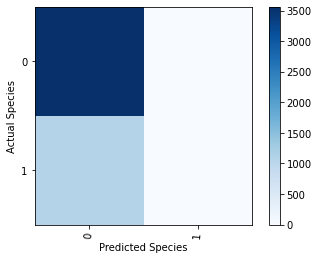

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Set the model to evaluate mode
model.eval()

# Get predictions for the test data
x = torch.Tensor(x_test).float()
_, predicted = torch.max(model(x).data, 1)

# Plot the confusion matrix
cm = confusion_matrix(y_test, predicted.numpy())
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'], rotation=85)
plt.yticks(tick_marks, ['0', '1'])
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

# Initialize weights

In [ ]:
import torch
from torch import nn

def init_weights(m, init_type = 'xavier'):
    if type(m) == nn.Linear:
      if init_type == 'xavier':
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)
      elif init_type == 'normal':
        torch.nn.init.normal_(m.weight)
        m.bias.data.fill_(0.01)
      elif init_type == 'he':
        m.bias.kaiming_uniform_(m.weight)
        m.bias.data.fill_(0.01)


In [ ]:
model1 = IncomeNet()
model1.apply(lambda m: init_weights(m, init_type = 'normal'))

for epoch in range(1, epochs + 1):

    # print the epoch number
    print('Epoch: {}'.format(epoch))
    
    # Feed training data into the model to optimize the weights
    train_loss = train(model1, train_loader, optimizer)
    
    # Feed the test data into the model to check its performance
    test_loss = test(model1, test_loader)
    
    # Log the metrics for this epoch
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)

Epoch: 1
Training set: Average loss: 1.034857
Validation set: Average loss: 0.881828, Accuracy: 2134/4639 (46%)

Epoch: 2
Training set: Average loss: 1.058328
Validation set: Average loss: 0.862228, Accuracy: 1968/4639 (42%)

Epoch: 3
Training set: Average loss: 1.052566
Validation set: Average loss: 0.815359, Accuracy: 2008/4639 (43%)

Epoch: 4
Training set: Average loss: 1.062635
Validation set: Average loss: 0.855678, Accuracy: 2080/4639 (45%)

Epoch: 5
Training set: Average loss: 1.057417
Validation set: Average loss: 0.831383, Accuracy: 2104/4639 (45%)

Epoch: 6
Training set: Average loss: 1.059334
Validation set: Average loss: 0.839491, Accuracy: 2077/4639 (45%)

Epoch: 7
Training set: Average loss: 1.044504
Validation set: Average loss: 0.854741, Accuracy: 2202/4639 (47%)

Epoch: 8
Training set: Average loss: 1.049611
Validation set: Average loss: 0.822071, Accuracy: 2097/4639 (45%)

Epoch: 9
Training set: Average loss: 1.066511
Validation set: Average loss: 0.814428, Accuracy: 

In [ ]:
model2 = IncomeNet()
model2.apply(lambda m: init_weights(m, init_type = 'xavier'))

for epoch in range(1, epochs + 1):

    # print the epoch number
    print('Epoch: {}'.format(epoch))
    
    # Feed training data into the model to optimize the weights
    train_loss = train(model2, train_loader, optimizer)
    
    # Feed the test data into the model to check its performance
    test_loss = test(model2, test_loader)
    
    # Log the metrics for this epoch
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)

Epoch: 1
Training set: Average loss: 0.742549
Validation set: Average loss: 0.715270, Accuracy: 1841/4639 (40%)

Epoch: 2
Training set: Average loss: 0.741697
Validation set: Average loss: 0.715315, Accuracy: 1852/4639 (40%)

Epoch: 3
Training set: Average loss: 0.748628
Validation set: Average loss: 0.718323, Accuracy: 1814/4639 (39%)

Epoch: 4
Training set: Average loss: 0.742950
Validation set: Average loss: 0.709287, Accuracy: 1892/4639 (41%)

Epoch: 5
Training set: Average loss: 0.740208
Validation set: Average loss: 0.716134, Accuracy: 1665/4639 (36%)

Epoch: 6
Training set: Average loss: 0.750402
Validation set: Average loss: 0.714019, Accuracy: 1855/4639 (40%)

Epoch: 7
Training set: Average loss: 0.743562
Validation set: Average loss: 0.710690, Accuracy: 1959/4639 (42%)

Epoch: 8
Training set: Average loss: 0.742381
Validation set: Average loss: 0.713090, Accuracy: 1754/4639 (38%)

Epoch: 9
Training set: Average loss: 0.741821
Validation set: Average loss: 0.723319, Accuracy: 

# Optuna

In [ ]:
!pip install optuna

     |████████████████████████████████| 308 kB 5.3 MB/s 
     |████████████████████████████████| 210 kB 39.6 MB/s 
     |████████████████████████████████| 81 kB 9.7 MB/s 
     |████████████████████████████████| 75 kB 4.8 MB/s 
     |████████████████████████████████| 113 kB 50.7 MB/s 
     |████████████████████████████████| 49 kB 6.0 MB/s 
     |████████████████████████████████| 149 kB 49.1 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=c07a2ded9ea74b0862b0abf6f35ccb85488b724e306a7e164e3b934dcd2d2694
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import optuna
from optuna.trial import TrialState
import torch.optim as optim
import torch.nn.functional as F

In [ ]:
import torch
import torch.nn as nn
import torch.utils.data as td

# Set random seed for reproducability
torch.manual_seed(0)

In [ ]:
# Create a dataset and loader for the training data and labels
train_x = torch.Tensor(x_train).float()
# Reshape y target into [-1, 1] to fit with Binary Cross Entropy
train_y = torch.Tensor(y_train).view(-1, 1).float()
train_ds = td.TensorDataset(train_x,train_y)
train_loader = td.DataLoader(train_ds, batch_size=16,
    shuffle=True, num_workers=1)

# Create a dataset and loader for the test data and labels
test_x = torch.Tensor(x_test).float()
test_y = torch.Tensor(y_test).view(-1, 1).float()
test_ds = td.TensorDataset(test_x,test_y)
test_loader = td.DataLoader(test_ds, batch_size=16,
    shuffle=False, num_workers=1)
print('Ready to load data')

Ready to load data


In [ ]:
def define_model(trial):
    # We optimize the number of layers, hidden units and dropout ratio in each layer.
    n_layers = trial.suggest_int("n_layers", 2, 6)
    layers = []

    in_features = 105
    for i in range(n_layers):
        out_features = trial.suggest_int("n_units_l{}".format(i), 4, 128)
        layers.append(nn.Linear(in_features, out_features))
        layers.append(nn.ReLU())
        p = trial.suggest_float("dropout_l{}".format(i), 0.2, 0.5)
        layers.append(nn.Dropout(p))

        in_features = out_features
    layers.append(nn.Linear(in_features, 1))
    layers.append(nn.Sigmoid())

    return nn.Sequential(*layers)

In [ ]:
DEVICE = torch.device("cpu")
BATCHSIZE = 16
EPOCHS = 30
LOG_INTERVAL = 10
N_TRAIN_EXAMPLES = BATCHSIZE * 300
N_VALID_EXAMPLES = BATCHSIZE * 100

def objective(trial):

    # Generate the model.
    model = define_model(trial).to(DEVICE)

    # Generate the optimizers.
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "RMSprop", "SGD"])
    lr = trial.suggest_float("lr", 1e-5, 1e-1, log=True)
    optimizer = getattr(optim, optimizer_name)(model.parameters(), lr=lr)
    loss_criteria = nn.BCELoss()
    # Training of the model.
    for epoch in range(EPOCHS):
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            # Limiting training data for faster epochs.
            if batch_idx * BATCHSIZE >= N_TRAIN_EXAMPLES:
                break

            data, target = data.view(data.size(0), -1).to(DEVICE), target.to(DEVICE)

            optimizer.zero_grad()
            output = model(data)
            # loss = F.nll_loss(output, target)
            loss = loss_criteria(output, target)
            loss.backward()
            optimizer.step()

        # Validation of the model.
        model.eval()
        correct = 0
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(test_loader):
                # Limiting validation data.
                if batch_idx * BATCHSIZE >= N_VALID_EXAMPLES:
                    break
                data, target = data.view(data.size(0), -1).to(DEVICE), target.to(DEVICE)
                output = model(data)
                # Get the index of the max log-probability.
                pred = torch.tensor(output.data>=0.5).float()
                correct += pred.eq(target.view_as(pred)).sum().item()

        accuracy = correct / min(len(test_loader.dataset), N_VALID_EXAMPLES)

        trial.report(accuracy, epoch)

        # Handle pruning based on the intermediate value.
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    return accuracy

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, timeout=600)

pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

print("Study statistics: ")
print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2022-02-18 17:27:54,383] A new study created in memory with name: no-name-cfc92aaa-17eb-4f4d-9624-aea2e9beea50
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
[I 2022-02-18 17:29:04,490] Trial 0 finished with value: 0.776875 and parameters: {'n_layers': 6, 'n_units_l0': 9, 'dropout_l0': 0.20624004453193695, 'n_units_l1': 121, 'dropout_l1': 0.3966810915060567, 'n_units_l2': 101, 'dropout_l2': 0.44985465220126325, 'n_units_l3': 19, 'dropout_l3': 0.22174300690165377, 'n_units_l4': 107, 'dropout_l4': 0.45757406249861504, 'n_units_l5': 83, 'dropout_l5': 0.3314032579197126, 'optimizer': 'Adam', 'lr': 0.01753015388520694}. Best is trial 0 with value: 0.776875.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: UserWarning: To copy construct from a tensor, it is recom

Study statistics: 
  Number of finished trials:  24
  Number of pruned trials:  11
  Number of complete trials:  13
Best trial:
  Value:  0.855625
  Params: 
    n_layers: 2
    n_units_l0: 84
    dropout_l0: 0.33517399241198476
    n_units_l1: 19
    dropout_l1: 0.29931198027887734
    optimizer: RMSprop
    lr: 0.000562113763724351


In [ ]:
model = define_model(trial)

In [ ]:
loss_criteria = nn.BCELoss()

optimizer = torch.optim.RMSprop(model.parameters(), lr=trial.params['lr'])
optimizer.zero_grad()

# We'll track metrics for each epoch in these arrays
epoch_nums = []
training_loss = []
validation_loss = []

# Train over 30 epochs
epochs = 30

In [ ]:
def train(model, data_loader, optimizer):
    '''
    Train model through data loader and optimizer
    Args:
      model: model to train
      data_loader: data loader to manage batch loading
      optimizer: control update gradient descent
    '''
    # enable train mode
    model.train()
    train_loss = 0
    
    for batch, tensor in enumerate(data_loader):
        data, target = tensor
        # reset optimizer into zero
        optimizer.zero_grad()
        # feed forward to compute output and loss
        out = model(data)
        loss = loss_criteria(out, target)
        # accumulate loss
        train_loss += loss.item()
        # compute gradient descent
        loss.backward()
        # update into weight
        optimizer.step()

    avg_loss = train_loss / (batch+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss
            

In [ ]:
# training through epoch
for epoch in range(1, epochs + 1):
    # print the epoch number
    print('Epoch: {}'.format(epoch))
    
    # Feed training data into the model to optimize the weights
    train_loss = train(model, train_loader, optimizer)
    
    # Feed the test data into the model to check its performance
    test_loss = test(model, test_loader)
    
    # Log the metrics for this epoch
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)

Epoch: 1
Training set: Average loss: 0.354720
Validation set: Average loss: 0.323743, Accuracy: 3936/4639 (85%)

Epoch: 2
Training set: Average loss: 0.330730
Validation set: Average loss: 0.320343, Accuracy: 3942/4639 (85%)

Epoch: 3
Training set: Average loss: 0.322764
Validation set: Average loss: 0.318693, Accuracy: 3947/4639 (85%)

Epoch: 4
Training set: Average loss: 0.320540
Validation set: Average loss: 0.317630, Accuracy: 3946/4639 (85%)

Epoch: 5
Training set: Average loss: 0.314688
Validation set: Average loss: 0.317852, Accuracy: 3950/4639 (85%)

Epoch: 6
Training set: Average loss: 0.315375
Validation set: Average loss: 0.318220, Accuracy: 3948/4639 (85%)

Epoch: 7
Training set: Average loss: 0.314440
Validation set: Average loss: 0.318280, Accuracy: 3955/4639 (85%)

Epoch: 8
Training set: Average loss: 0.311180
Validation set: Average loss: 0.317888, Accuracy: 3964/4639 (85%)

Epoch: 9
Training set: Average loss: 0.310036
Validation set: Average loss: 0.316253, Accuracy: 

Evaluation on test dataset
ACCURACY_SCORE:  0.8571
F1_SCORE:  0.782
CONFUSION_MATRIX:
 [[3349  206]
 [ 457  627]] 

              precision    recall  f1-score   support

           0     0.8799    0.9421    0.9099      3555
           1     0.7527    0.5784    0.6541      1084

    accuracy                         0.8571      4639
   macro avg     0.8163    0.7602    0.7820      4639
weighted avg     0.8502    0.8571    0.8502      4639
 



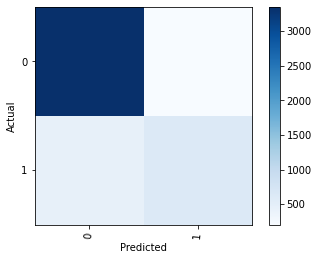

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
def _evaluate(model, x_test):
  model.eval()
  x = torch.Tensor(x_test).float()
  predictions = [1 if i>0.5 else 0 for i in model(x).data]
  predictions = torch.tensor(predictions)
  print('Evaluation on test dataset')
  get_metrics(y_test, predictions)

  # Plot the confusion matrix
  classes=['0','1']
  cm = confusion_matrix(y_test, predictions.numpy())
  plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
  plt.colorbar()
  tick_marks = np.arange(2)
  plt.xticks(tick_marks, classes, rotation=85)
  plt.yticks(tick_marks, classes)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()
_evaluate(model, x_test)

# Flask API

In [ ]:
torch.save(model.state_dict(), 'income_model.pth')

In [ ]:
from PIL import Image
import numpy as np
from flask import Flask, request, make_response 
import flask
import json

# Khởi tạo model.
# PATH = 'income_model.pth'
# model = IncomeNet()
# model.load_state_dict(torch.load(PATH))
model.eval()

# Khởi tạo flask app
app = Flask(__name__)

# Khai báo các route 1 cho API
@app.route("/", methods=["GET"])
# Khai báo hàm xử lý dữ liệu.
def _hello_world():
  return "Hello world"


# @app.route('/csv/')  
# def download_csv():  
#     csv = 'foo,bar,baz\nhai,bai,crai\n'  
#     response = make_response(csv)
#     cd = 'attachment; filename=test.csv'
#     response.headers['Content-Disposition'] = cd 
#     response.mimetype='text/csv'

#     return response

# Khai báo các route 2 cho API
@app.route("/predict", methods=["GET"])
# Khai báo hàm xử lý dữ liệu.
def _predict():
    x = torch.Tensor(x_test).float()
    _, predicted = torch.max(model(x).data, 1)
    return predicted

if __name__ == "__main__":
  print("App run!")
  app.run(debug=False, host='localhost', threaded=False)


App run!
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://localhost:5000/ (Press CTRL+C to quit)
